In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\\Machine_learning\\kMeans\\telecom_churn_data.csv")

In [3]:
df.shape

(99999, 226)

In [4]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [5]:
df1= df.iloc[:1000,:20]

In [6]:
df1.shape

(1000, 20)

In [7]:
df1.isnull().sum()

mobile_number            0
circle_id                0
loc_og_t2o_mou           9
std_og_t2o_mou           9
loc_ic_t2o_mou           9
last_date_of_month_6     0
last_date_of_month_7     8
last_date_of_month_8    12
last_date_of_month_9    17
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6             37
onnet_mou_7             42
onnet_mou_8             61
onnet_mou_9             86
offnet_mou_6            37
offnet_mou_7            42
offnet_mou_8            61
dtype: int64

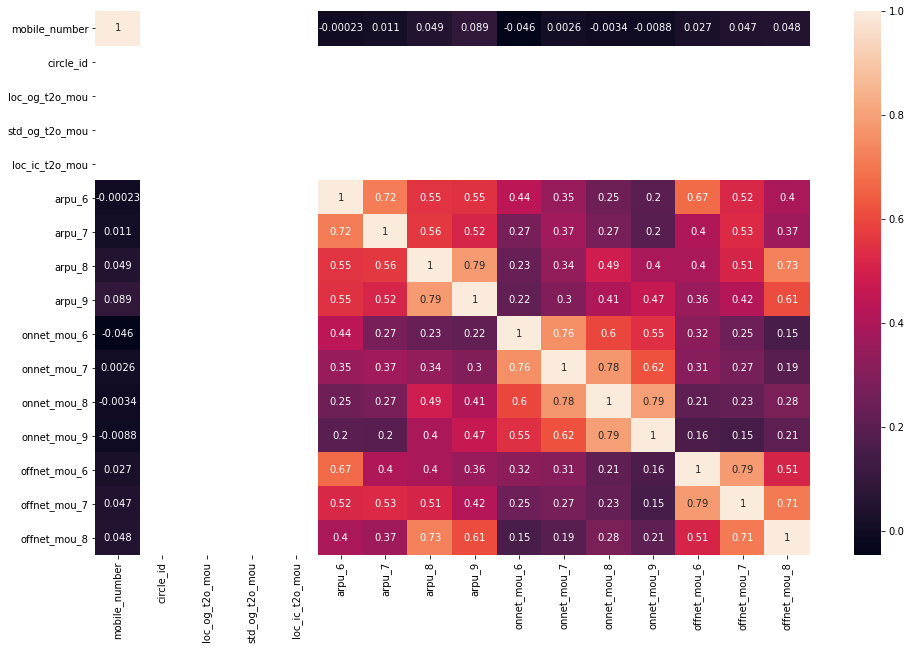

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(),annot =True)
plt.show()

# Log Leval Tranfromation

In [9]:
df1.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
dtype: object

In [10]:
df1.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"],axis=1,inplace=True)

In [11]:
df1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26


In [12]:

logdata = np.log(df1)
logdata

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,22.669296,4.691348,-inf,-inf,-inf,5.285156,5.369782,5.365055,3.049273,NaN,NaN,-inf,NaN,NaN,NaN,-inf
1,22.669442,4.691348,-inf,-inf,-inf,3.527742,5.872326,5.592184,4.457656,3.182627,4.365389,2.038620,2.909084,2.756205,4.603569,5.719525
2,22.669408,4.691348,-inf,-inf,-inf,5.122117,5.242054,5.348183,5.672340,2.445819,4.011687,3.617920,4.314952,4.965150,5.396306,5.339267
3,22.669348,4.691348,-inf,-inf,-inf,5.399691,5.525859,6.230588,5.964864,4.604270,3.996180,5.739729,5.487739,4.814702,4.691440,4.272212
4,22.669196,4.691348,-inf,-inf,-inf,5.566954,5.736172,5.473001,5.096360,3.918204,5.006895,4.429506,4.073802,4.343286,4.520483,4.822376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22.669341,4.691348,-inf,-inf,-inf,4.775875,4.485711,4.528764,4.788991,4.231349,3.793915,3.787140,4.404766,4.408060,3.802878,4.407694
996,22.669185,4.691348,-inf,-inf,-inf,5.365139,5.636641,5.526890,5.432853,-inf,3.144152,1.589235,-0.597837,-inf,4.034064,2.683758
997,22.669387,4.691348,-inf,-inf,-inf,5.859004,-inf,-inf,-inf,2.738256,-inf,-inf,-inf,6.340430,-inf,-inf
998,22.669280,4.691348,-inf,-inf,-inf,5.788068,4.477689,-inf,-inf,3.996180,1.220830,NaN,NaN,5.838634,4.727299,NaN


## Range Level  Standarization or Nirmalization or min_max scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
rangeleveldata = MinMaxScaler().fit_transform(df1)
pd.DataFrame(rangeleveldata)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.348984,0.0,0.0,0.0,0.0,0.089195,0.474062,0.077733,0.013978,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
1,0.774125,0.0,0.0,0.0,0.0,0.048520,0.503893,0.094186,0.033532,0.005971,0.024431,0.002831,0.004357,0.003098,0.019219,0.082459
2,0.674463,0.0,0.0,0.0,0.0,0.081800,0.468583,0.076653,0.094858,0.002858,0.017153,0.013737,0.017774,0.028209,0.042463,0.056376
3,0.499180,0.0,0.0,0.0,0.0,0.095160,0.481779,0.166535,0.124493,0.024741,0.016889,0.114652,0.057429,0.024269,0.020984,0.019394
4,0.057976,0.0,0.0,0.0,0.0,0.105195,0.494280,0.085088,0.056674,0.012459,0.046403,0.030929,0.013966,0.015147,0.017687,0.033621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.480211,0.0,0.0,0.0,0.0,0.069579,0.447246,0.041168,0.043700,0.017040,0.013796,0.016270,0.019445,0.016160,0.008630,0.022208
996,0.024152,0.0,0.0,0.0,0.0,0.093288,0.488036,0.089067,0.076285,0.000000,0.007204,0.001807,0.000131,0.000000,0.010874,0.003961
997,0.611895,0.0,0.0,0.0,0.0,0.127293,0.428372,0.013209,0.007648,0.003828,0.000000,0.000000,0.000000,0.111600,0.000000,0.000000
998,0.301631,0.0,0.0,0.0,0.0,0.121318,0.447095,0.013209,0.007648,0.013469,0.001053,NaN,NaN,0.067567,0.021750,NaN


## Standard Deviation Level Standarization

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
stdout = StandardScaler().fit_transform(df1)

In [17]:
pd.DataFrame(stdout).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.519778,0.0,0.0,0.0,0.0,-0.268344,-0.157790,-0.159684,-0.755190,NaN,NaN,-0.437095,NaN,NaN,NaN,-0.602079
1,0.940100,0.0,0.0,0.0,0.0,-0.809857,0.304439,0.016208,-0.537346,-0.373680,-0.159529,-0.408754,-0.313606,-0.516276,-0.260465,0.450631
2,0.597873,0.0,0.0,0.0,0.0,-0.366791,-0.242678,-0.171225,0.145845,-0.419669,-0.245604,-0.299593,-0.140266,-0.163860,0.092211,0.117644
3,-0.004025,0.0,0.0,0.0,0.0,-0.188932,-0.038207,0.789662,0.475983,-0.096356,-0.248725,0.710527,0.372050,-0.219157,-0.233682,-0.354480
4,-1.519063,0.0,0.0,0.0,0.0,-0.055333,0.155486,-0.081056,-0.279544,-0.277824,0.100312,-0.127513,-0.189471,-0.347180,-0.283714,-0.172857
5,-1.313836,0.0,0.0,0.0,0.0,-0.756113,-0.671919,-0.580451,-0.254814,-0.278373,-0.288237,-0.121645,0.056127,-0.506498,-0.512815,-0.552131
6,-0.222330,0.0,0.0,0.0,0.0,0.499604,-0.237253,-0.026402,-0.442214,-0.202018,-0.283096,-0.154194,-0.323153,0.165934,-0.408254,-0.284014
7,-0.721205,0.0,0.0,0.0,0.0,2.621913,3.582791,9.382711,0.845268,-0.250275,-0.247660,-0.244127,NaN,0.692665,1.104445,0.523688
8,0.453583,0.0,0.0,0.0,0.0,0.332838,0.756423,-0.406307,-0.268312,1.051647,0.840580,-0.307638,-0.267194,-0.298291,-0.316572,-0.130646
9,0.938133,0.0,0.0,0.0,0.0,-0.526495,-0.050292,-0.300261,-0.290854,-0.337899,-0.337885,-0.354321,-0.284445,-0.384413,-0.393884,-0.331475


In [18]:
len(stdout[stdout>3])

195

In [19]:
stdoutput = pd.DataFrame(stdout)

In [20]:
type(stdoutput)

pandas.core.frame.DataFrame

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:>

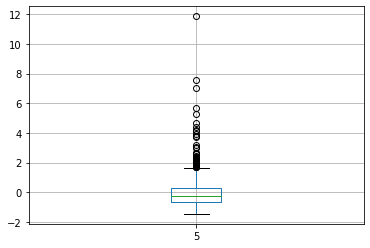

In [22]:
stdoutput.boxplot(5)

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df3 = pd.read_csv("F:\\Machine_learning\\kMeans\\telecom_churn_data.csv")

In [25]:
data= df3.iloc[:1000,:20]

In [26]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26


In [27]:
data.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"],axis=1,inplace=True)

In [28]:
data.dropna(inplace=True)


# PCA

In [54]:
x = data.iloc[:,:-1].values.astype('int')
y = data.iloc[:,-1].values.astype("int")

In [55]:
type(x)


numpy.ndarray

In [56]:
type(y)

numpy.ndarray

In [57]:
from sklearn.preprocessing import StandardScaler as sc
std = sc().fit_transform(data)

In [58]:
std[:7]

array([[ 0.91079983,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.83952375,  0.28121238, -0.03110419, -0.60093875, -0.37680688,
        -0.16846761, -0.41305664, -0.31568065, -0.552313  , -0.29003559,
         0.43975581],
       [ 0.56364395,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.38483569, -0.2946388 , -0.22435095,  0.06720809, -0.42495532,
        -0.25349729, -0.30608411, -0.14525539, -0.16153688,  0.11509358,
         0.11032311],
       [-0.04692417,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.20231132, -0.07942996,  0.76634178,  0.39007596, -0.08646067,
        -0.2565807 ,  0.68379156,  0.35844527, -0.22285311, -0.25926926,
        -0.35676051],
       [-1.58378367,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.06520709,  0.1244364 , -0.13138494, -0.34881446, -0.27644975,
         0.08821756, -0.13745228, -0.19363359, -0.36481152, -0.31674224,
        -0.17707616],
       [-1.37560073,  0.        ,  0

In [59]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=5)
model = pca.fit(std)
model

PCA(n_components=5)

In [60]:
print("Variance explained by  5 principal components are ",model.explained_variance_ratio_)

Variance explained by  5 principal components are  [0.4494505  0.18353834 0.08365899 0.08173761 0.0755494 ]


In [61]:
print("Total information present in 5 columns is ",round(sum(model.explained_variance_ratio_)*100))

Total information present in 5 columns is  87


In [62]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=8)
model = pca.fit(std)
model

PCA(n_components=8)

In [63]:
print("Variance explained by  8 principal components are ",model.explained_variance_ratio_)

Variance explained by  8 principal components are  [0.4494505  0.18353834 0.08365899 0.08173761 0.0755494  0.03896222
 0.02897014 0.02154038]


In [64]:
print("Total information present in 8 columns is ",round(sum(model.explained_variance_ratio_)*100))

Total information present in 8 columns is  96


In [65]:


import matplotlib.pyplot as plt


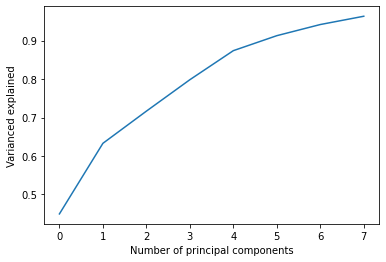

In [66]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Varianced explained")
#Plt.title("Principal components Analysis")
plt.show()

# LDA

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [68]:
lda = LDA(n_components = 5)
model = lda.fit(x,y)

In [71]:
print("Variance explained by  5  components are ",np.around(model.explained_variance_ratio_,4))

Variance explained by  5  components are  [0.5044 0.1189 0.1006 0.077  0.0606]


In [72]:
print("Total information present in 5 columns is ",round(sum(model.explained_variance_ratio_)*100))

Total information present in 5 columns is  86


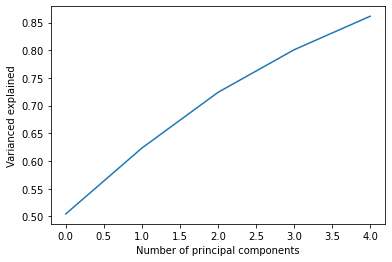

In [73]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Varianced explained")
#Plt.title("Principal components Analysis")
plt.show()